This is the second test after we found out which industry is significant. In here, we want to find which company in that industry is the main contributor to that significance.

In [332]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import statistics
import seaborn as sns
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})

For example here we use Security industry data. But it doesn't have 'rsi' columns so we remove in from our work.

In [333]:
path = os.getcwd()
csv_files = glob.glob(os.path.join(path,"Security2", "*.csv"))

df1 = pd.DataFrame()
group_dict = dict()
number_group = 0
# loop over the list of csv files
for f in csv_files:
    df = pd.read_csv(f)
    c = df.values[:,0]
    v = df.values[:, 1:].T
    df = pd.DataFrame(data = v, columns = c)
    df = df.iloc[:15]
    df[df.columns[3:]] = df[df.columns[3:]].apply(pd.to_numeric)
    print(list(df[["priceToEarning", "priceToBook","roe","debtOnEquity"]].std()), df.shape)
    #df[['roe']].hist(bins = 20) 
    number_group += 1
    df['group'] = number_group
    
    group_dict[number_group] = os.path.basename(f)
    df1 = pd.concat([df1, df])
    


[28.565883747675556, 1.1429702324999336, 0.11204301894914334, 0.2294921930407801] (15, 40)
[107.15651970032302, 0.8597895645087205, 0.13073848852175238, 0.3480558247506529] (15, 38)
[6.936123522819467, 1.418684836976369, 0.05431609425610512, 0.5257194616722425] (15, 38)
[4.624448487065654, 0.8408046033130295, 0.04083917353764759, 0.5501514942874068] (15, 37)
[26.69578529245679, 1.1184598253636029, 0.09758722594001054, 0.07988086367179803] (15, 38)
[7.286210067165038, 1.1506933727519413, 0.10552711229144587, 0.47278304699281415] (15, 39)
[8.732031891397384, 0.3563037762252611, 0.028373696739527377, 0.348192612268117] (15, 37)
[4904.4258763265, 4.197765845689597, 0.1042164414411981, 0.0] (15, 40)
[23.77462633024665, 0.8971913847961208, 0.1196547414140248, 0.11872336794093273] (15, 37)
[3.625150243191899, 0.5583137878597355, 0.05252681854697338, 0.04577377082170635] (15, 40)
[993.9165921219134, 0.8640987597877147, 0.15401552179043823, 0.15055453054181617] (15, 37)
[39.870788925274724, 1.4

In [334]:
df1 = df1[["priceToEarning", "priceToBook","roe","debtOnEquity","group"]]
df1.head()

,priceToEarning,priceToBook,roe,debtOnEquity,group
0,-92.8,1.2,-0.016,0.1,1
1,42.1,0.7,0.021,0.0,1
2,14.5,0.9,0.087,0.1,1
3,11.8,0.9,0.109,0.0,1
4,11.9,2.7,0.287,0.5,1


In [335]:
df1.isna().sum()
df1.dropna()

,priceToEarning,priceToBook,roe,debtOnEquity,group
0,-92.8,1.2,-0.016,0.1,1
1,42.1,0.7,0.021,0.0,1
2,14.5,0.9,0.087,0.1,1
3,11.8,0.9,0.109,0.0,1
4,11.9,2.7,0.287,0.5,1
...,...,...,...,...,...
10,17.1,1.8,0.111,0.3,18
11,11.8,0.8,0.071,0.0,18
12,36.0,1.0,0.029,0.2,18
13,21.5,1.7,0.080,0.2,18


In [336]:
group_dict

{1: 'ratio_SHS.csv',
 2: 'ratio_TVS.csv',
 3: 'ratio_SSI.csv',
 4: 'ratio_MBS.csv',
 5: 'ratio_TVB.csv',
 6: 'ratio_VND.csv',
 7: 'ratio_PHS.csv',
 8: 'ratio_SBS.csv',
 9: 'ratio_FTS.csv',
 10: 'ratio_AGR.csv',
 11: 'ratio_VDS.csv',
 12: 'ratio_VIX.csv',
 13: 'ratio_ORS.csv',
 14: 'ratio_APG.csv',
 15: 'ratio_HCM.csv',
 16: 'ratio_EVS.csv',
 17: 'ratio_VCI.csv',
 18: 'ratio_TCI.csv'}

there are 18 companies in this industry. We will use boxplot to visualize our data.

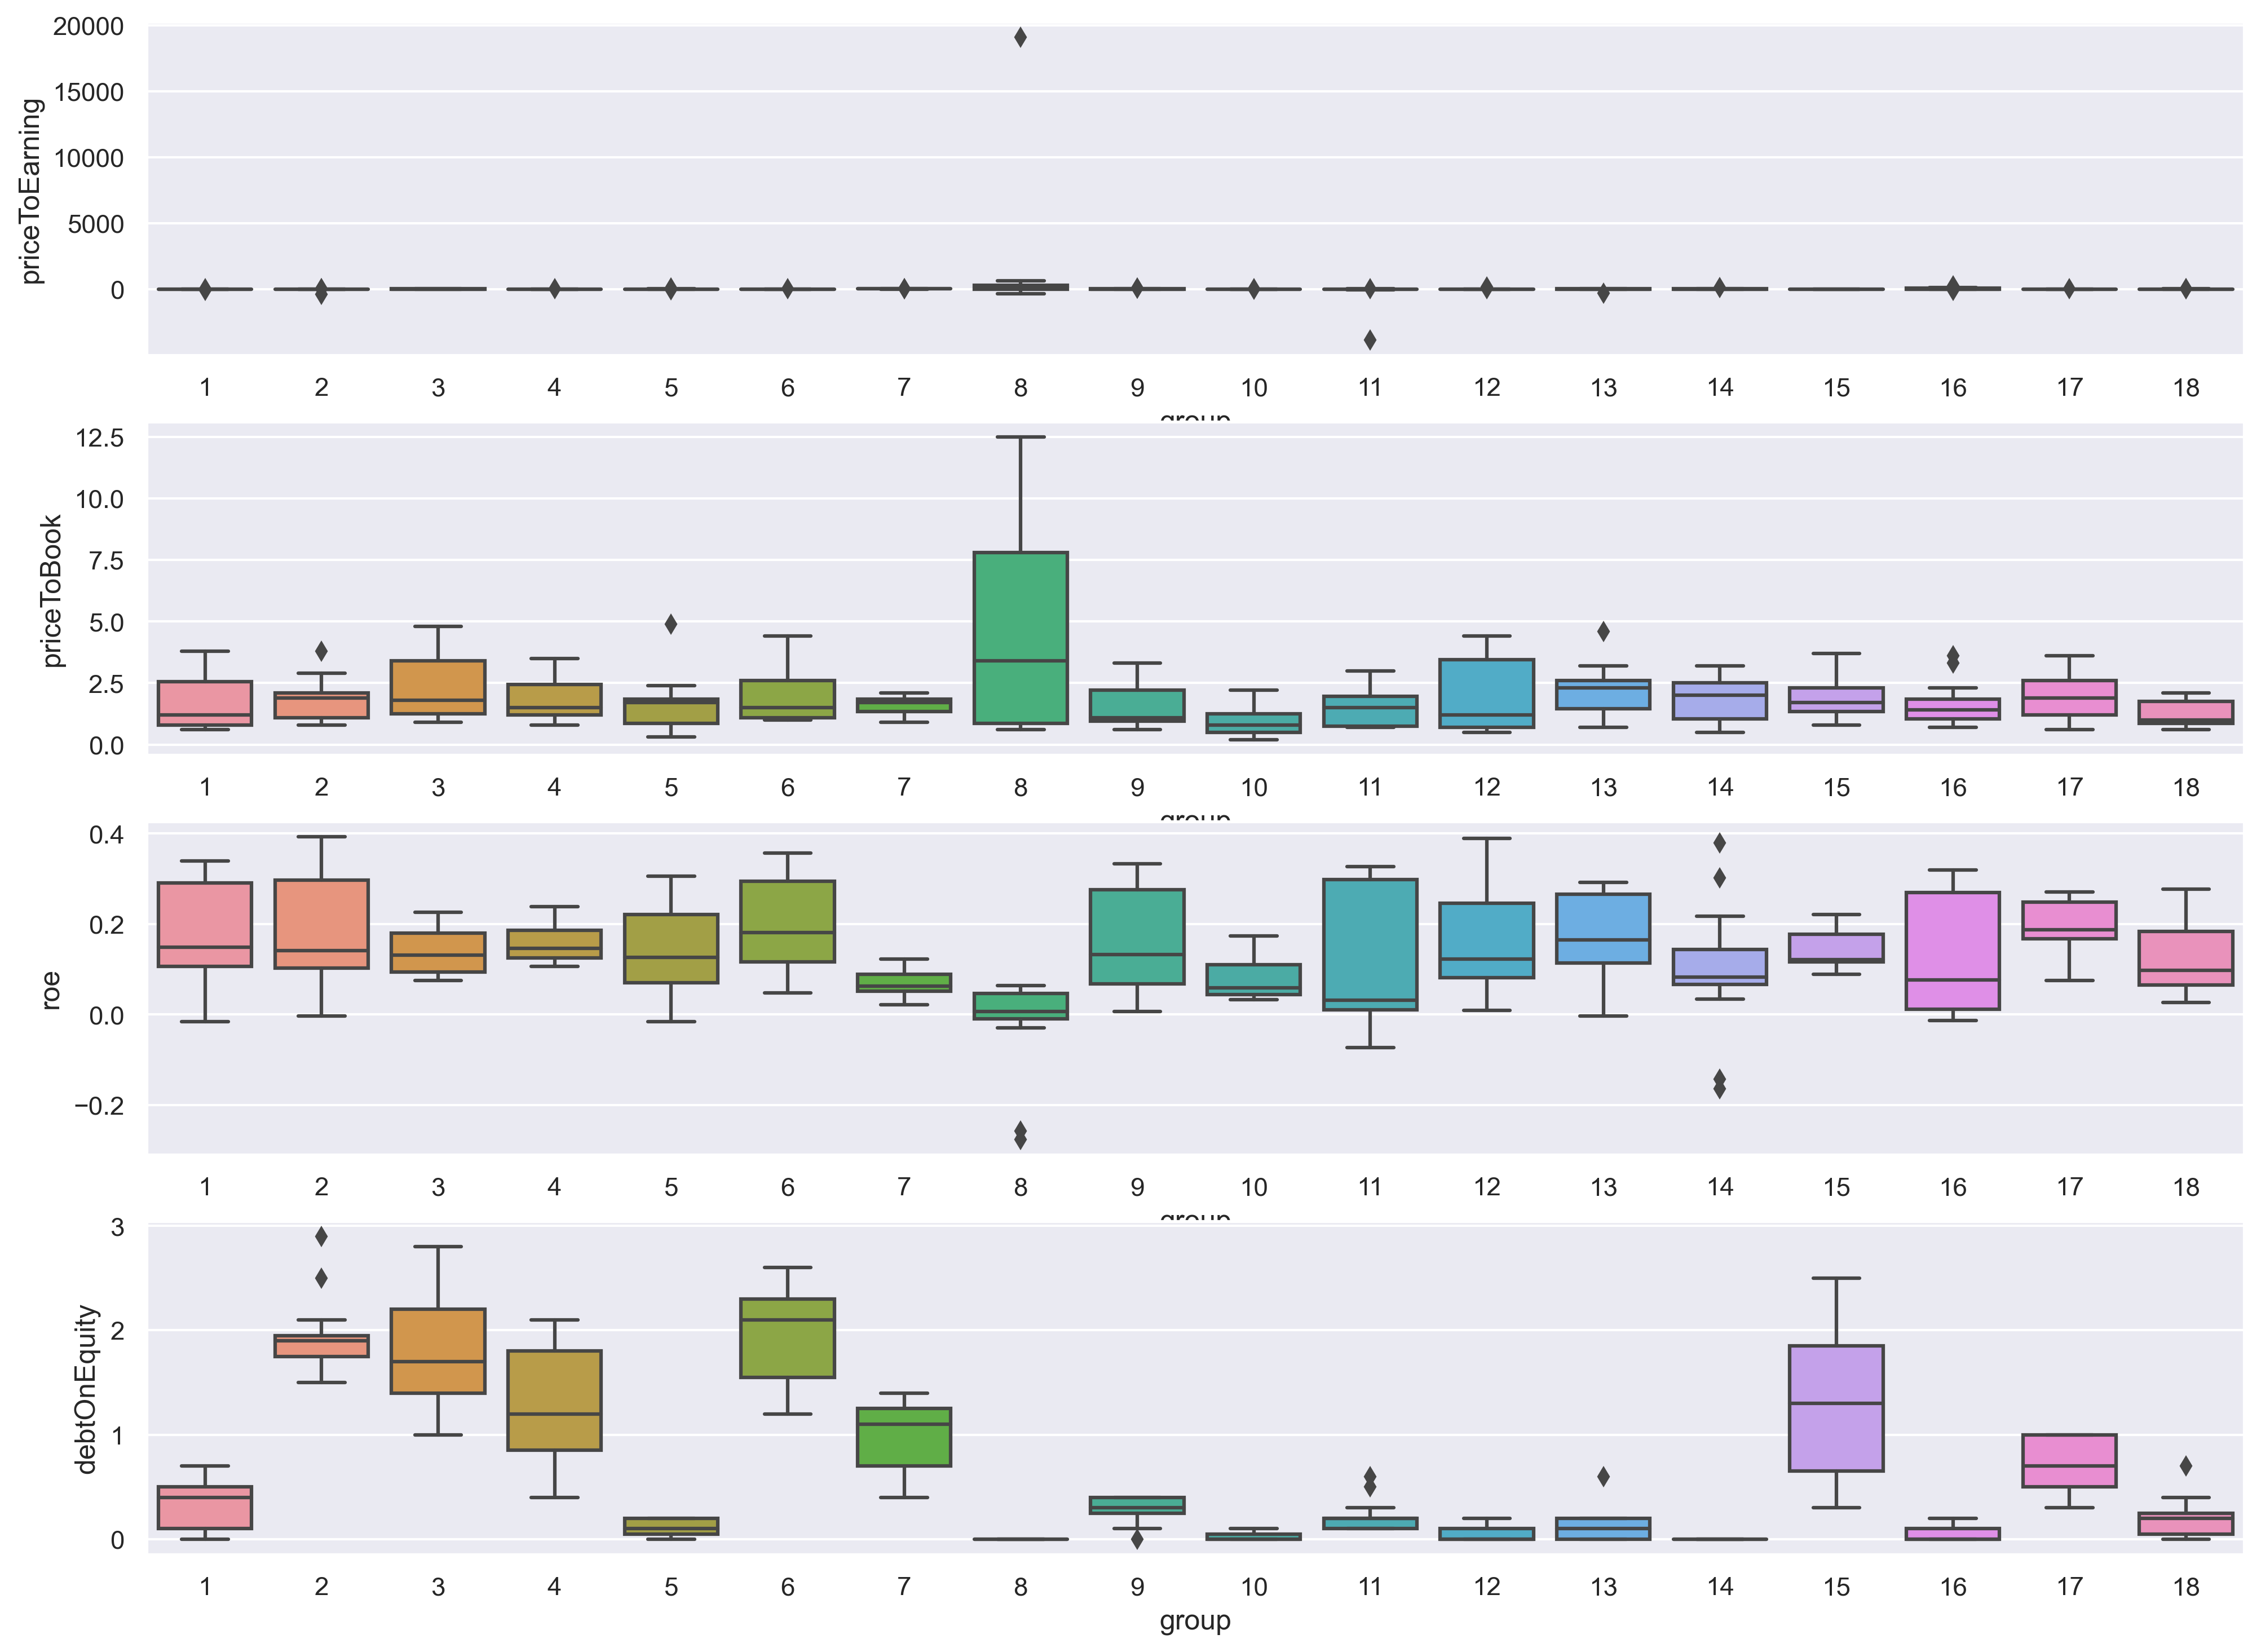

In [337]:

figs, axs = plt.subplots(nrows=4,figsize = (16,12))
for id,col in enumerate(["priceToEarning", "priceToBook", "roe", "debtOnEquity"]):
  ax = sns.boxplot(x = "group",y=col, data = df1, ax = axs[id])

As you can see, variances of our groups is non-homogeneous and there are a lot of outliers.

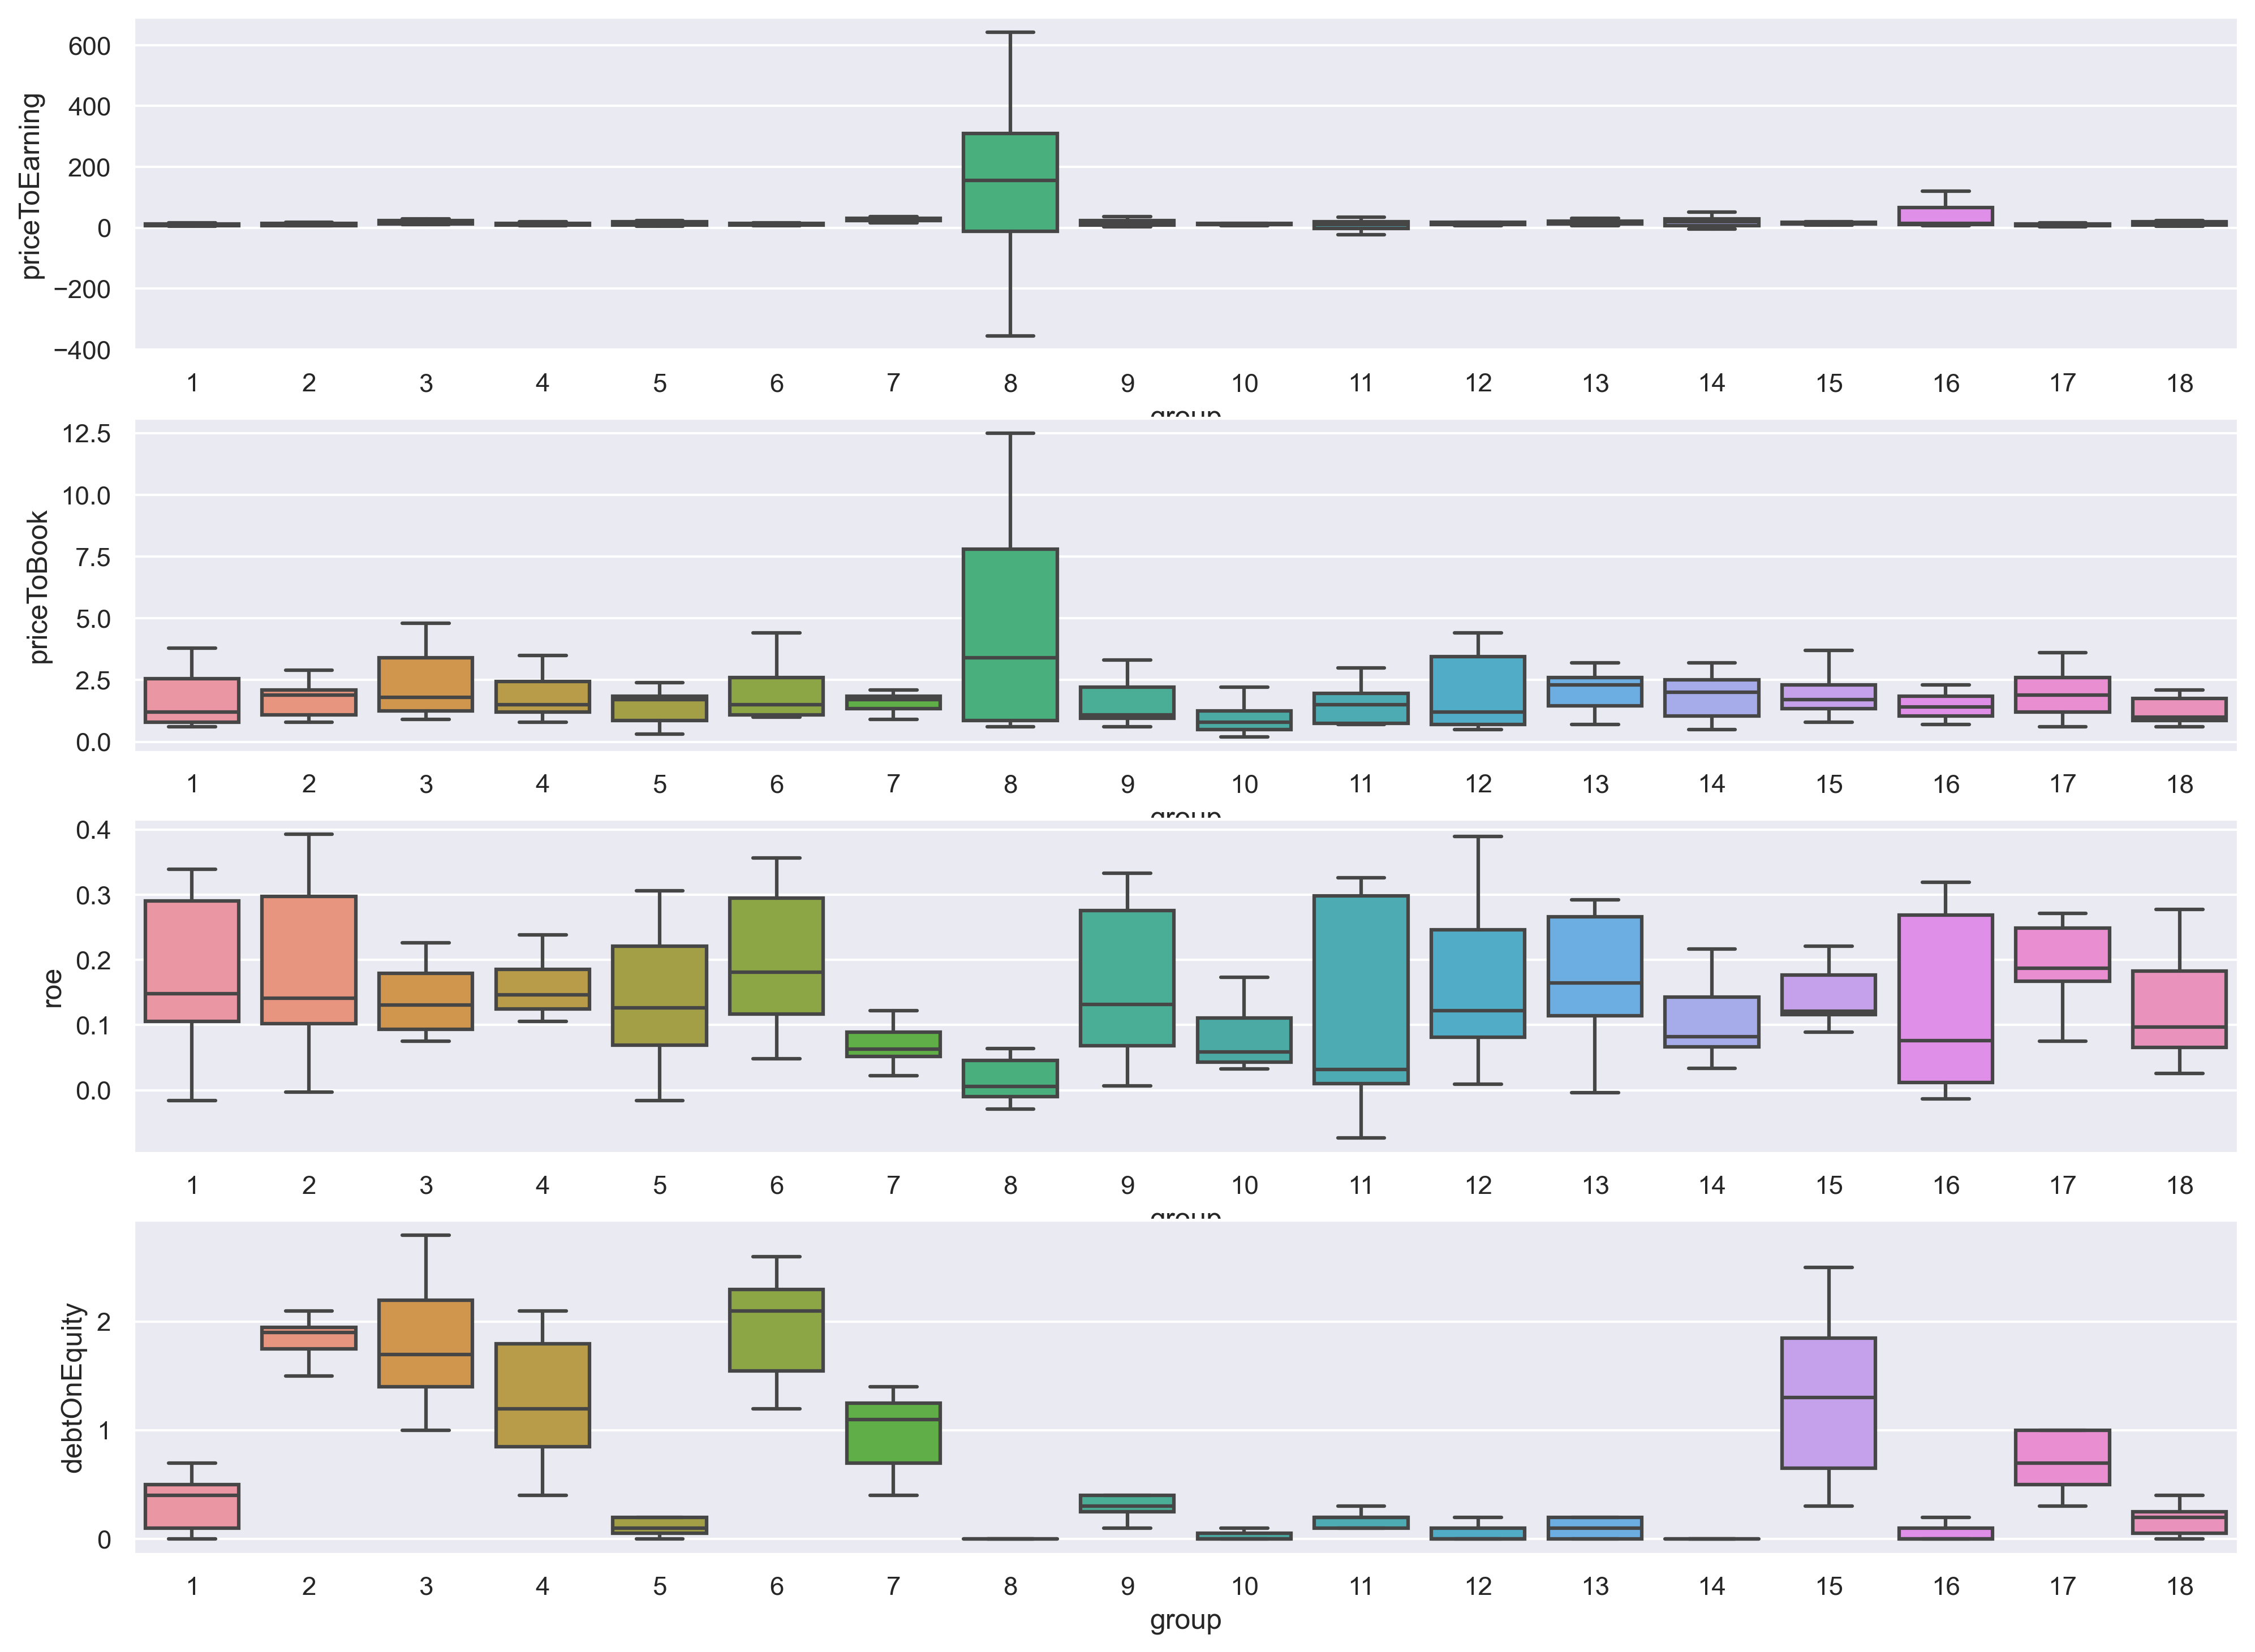

In [338]:

figs, axs = plt.subplots(nrows=4,figsize = (16,12))
for id,col in enumerate(["priceToEarning", "priceToBook","roe","debtOnEquity"]):
  ax = sns.boxplot(x = "group",y=col, data = df1, ax = axs[id], showfliers=False)

Even when outliers is not in the plot, variance of groups still not homegeneous.
We apply ranks for all columns in the dataframe. It will help to remove the effects of outliers.

In [339]:
for col in df1.columns[:-1]:
    df1[col] = df1[col].rank()

In [340]:
group_dict

{1: 'ratio_SHS.csv',
 2: 'ratio_TVS.csv',
 3: 'ratio_SSI.csv',
 4: 'ratio_MBS.csv',
 5: 'ratio_TVB.csv',
 6: 'ratio_VND.csv',
 7: 'ratio_PHS.csv',
 8: 'ratio_SBS.csv',
 9: 'ratio_FTS.csv',
 10: 'ratio_AGR.csv',
 11: 'ratio_VDS.csv',
 12: 'ratio_VIX.csv',
 13: 'ratio_ORS.csv',
 14: 'ratio_APG.csv',
 15: 'ratio_HCM.csv',
 16: 'ratio_EVS.csv',
 17: 'ratio_VCI.csv',
 18: 'ratio_TCI.csv'}

In [341]:
lis_group= []

for i in range(1,number_group+1):
  lis_group.append(df1.loc[df1["group"] == i].drop(["group"],axis = 1))

In [344]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(*lis_group)
print(fvalue, pvalue)

[ 2.76933565  2.05646505  5.03410252 85.65615152] [2.96864929e-04 9.18768073e-03 2.11181148e-09 2.99087931e-94]


In [345]:
from scipy.stats import t
def ANOM(args, alpha = 0.05):
    if not (0 < alpha < 1):
        raise ValueError("alpha can only get values between 0 - 1")

    k = len(args)
    mean_var = np.sum([np.var(group,axis =0) for group in args],axis = 0)/(k)
    
    N = sum(len(i) for i in args)
    
    a2 = 1 - (1-alpha)**(1/k)
    df = N - k
    grand = np.mean(np.concatenate((args),axis =0),axis =0)

    result = []
    for group in args:
        ni = len(group)
        h = abs(t.ppf(q = a2/2, df = df))
        UDL = grand + np.sqrt(mean_var)*h*np.sqrt((N-ni)/(N*ni))
        LDL = grand - np.sqrt(mean_var)*h*np.sqrt((N-ni)/(N*ni))
        result.append([UDL,LDL])
        
    return grand,result
    
grand_mean, DL = ANOM([np.atleast_2d(g) for g in lis_group])

In [348]:
grand_mean

array([135.5, 135.5, 135.5, 135.5])

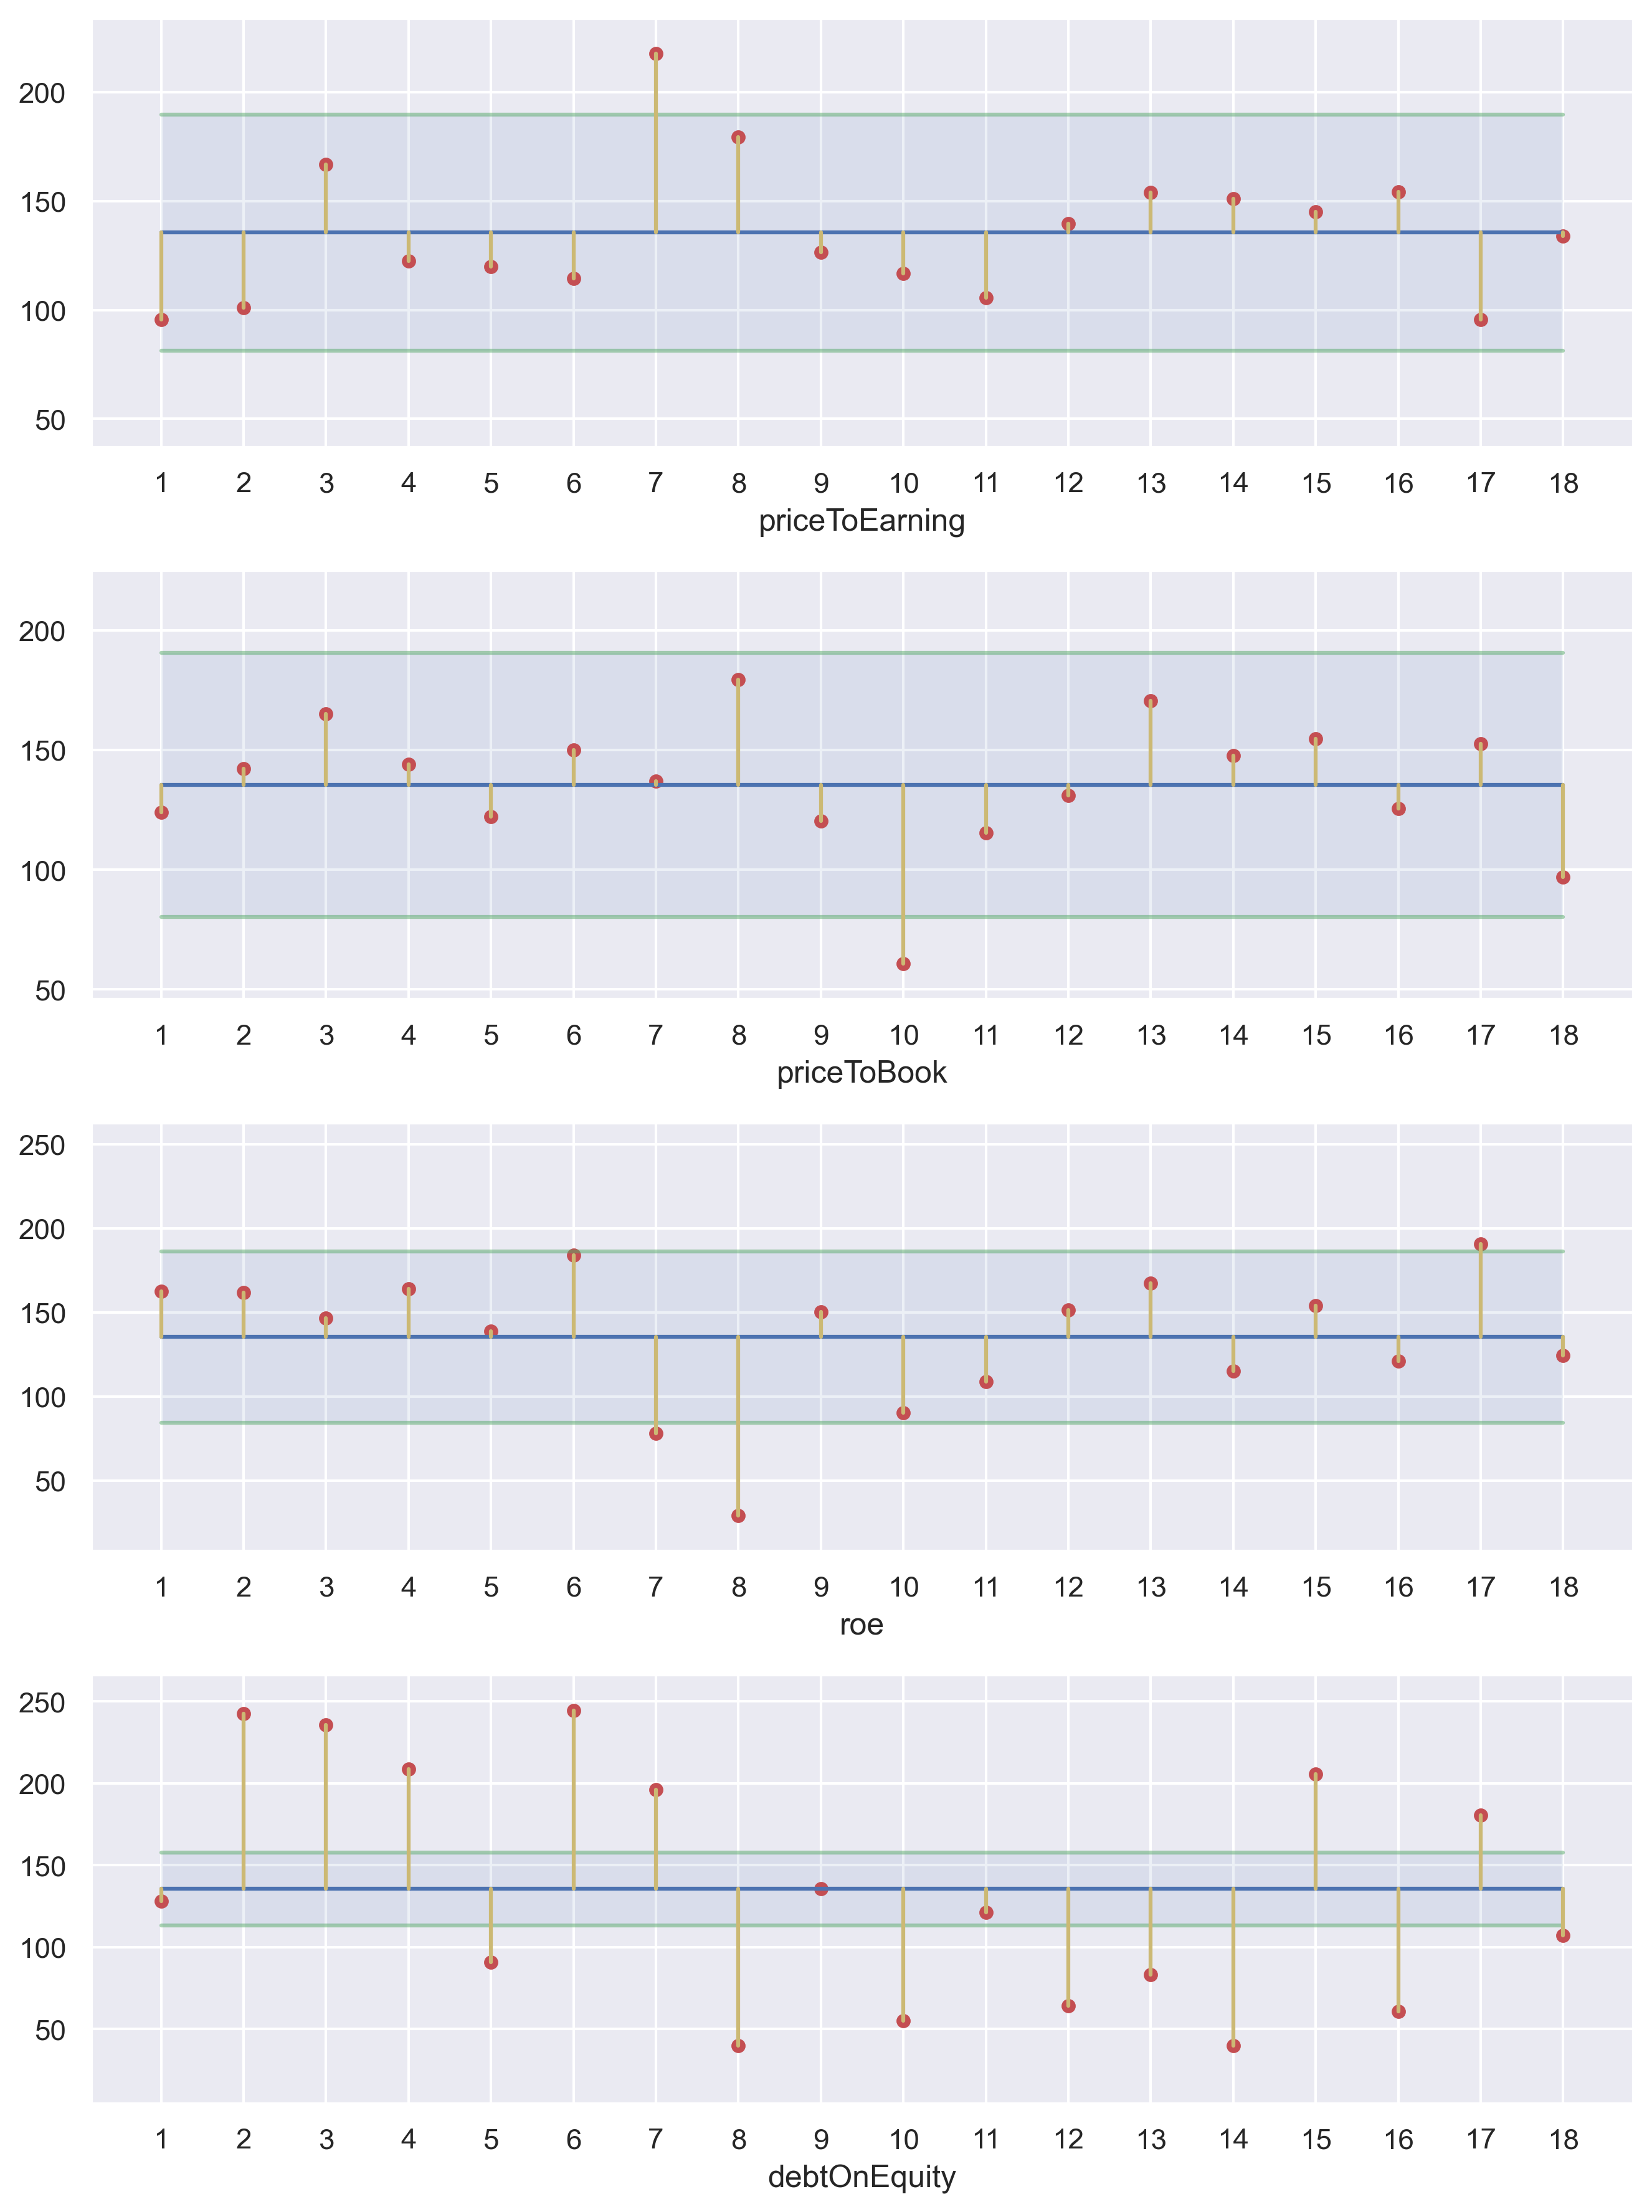

In [347]:
att_name = ["priceToEarning", "priceToBook","roe","debtOnEquity"]
x = np.linspace(1,number_group,1000)
figs, axs = plt.subplots(nrows=4,figsize = (9,12))
for i in range(len(np.atleast_1d(lis_group[0])[0])):
  axs[i].plot(x,0*x + grand_mean[i])
  x = np.arange(1,1+len(lis_group))
  axs[i].plot(x, [DL[j][0][i] for j in range(len(DL))],'g',alpha = .5)
  axs[i].plot(x, [DL[j][1][i] for j in range(len(DL))],'g',alpha = .5)
  axs[i].fill_between(x,[DL[j][0][i] for j in range(len(DL))],[DL[j][1][i] for j in range(len(DL))],alpha=0.1)
  axs[i].scatter(x, [lis_group[j].mean()[i] for j in range(len(DL))],20,'r')
  tol = max(max(np.abs(-grand_mean[i]+[lis_group[j].mean()[i] for j in range(len(DL))]))*1.2, max([DL[k][0][i]-grand_mean[i] for k in range(len(DL))])*1.2)
  axs[i].set_ylim(grand_mean[i]-tol,grand_mean[i]+tol)
  axs[i].set_xticks(range(1,len(DL)+1))
  axs[i].set_xlabel(att_name[i])
  for j in range(1, len(DL)+1):
    axs[i].plot([j,j],[grand_mean[i],lis_group[j-1].mean()[i]],c = 'y')

figs.tight_layout()
